**CSE-221710304026-K.vijayalakshmi**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv',
               index_col='Unnamed: 0')
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [3]:
#Preprocessing steps:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler
sc=StandardScaler()
df=pd.DataFrame(sc.fit_transform(df),columns=df.columns) #scaling the data
df.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


Text(0.5, 1.0, 'TV Vs sales')

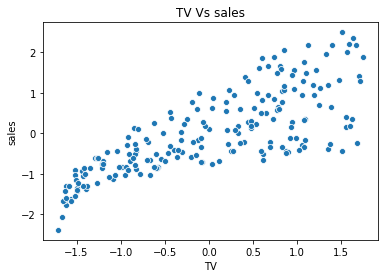

In [7]:
#Visualize the relationship between the features and the response using scatterplots
sns.scatterplot(df.TV,df.sales)
plt.title('TV Vs sales')

Text(0.5, 1.0, 'Radio Vs Sales')

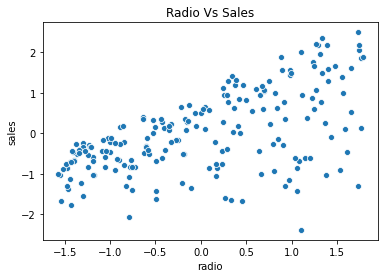

In [8]:
sns.scatterplot(df.radio,df.sales)
plt.title('Radio Vs Sales')

Text(0.5, 1.0, 'Newspaper Vs Sales')

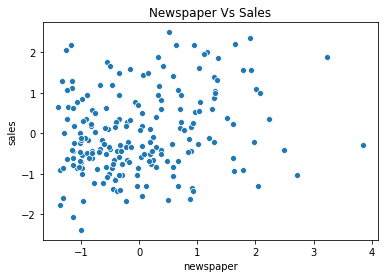

In [9]:
sns.scatterplot(df.newspaper,df.sales)
plt.title('Newspaper Vs Sales')

In [10]:
#Check for correlation and observe if there is  any multicollinearity.
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000



The corr() values between the input is always >0.75.

corr() value between:

TV and radio: 0.054

TV and newspaper: 0.056

radio and newspaper: 0.354


Therefore, no input columns are correlated so there is no multicollinearity.

In [11]:
from sklearn.model_selection import train_test_split #model splitting

In [12]:
#After building a Linear Regression Model, write down the interpretation of the model
X=df.drop(['sales'],axis=1)
y=df.sales
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lr.intercept_)
print(lr.coef_)

0.0011620874606385126
[0.77081214 0.50806629 0.01079522]


**Interpretation of the model:**

**The regression line of the model, makes an intercept on the y-axis at 0.001162087460638478**

**and the coef of the inputs respectively are:**

**[0.77081214, 0.50806629, 0.01079522]**

**and the effect of the inputs TV, Radio and newpaper on Sales respectively are in the order:**

**TV > Radio > Newspaper**

**Therefore, it can be interpreted that the model thinks that the amount spent on TV commercials**

**is of great significance as it brings in much more sales than any other Media.**

**Radio is also moderately useful but not greater than TV**

In [15]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

Text(0.5, 1.0, 'Training Data')

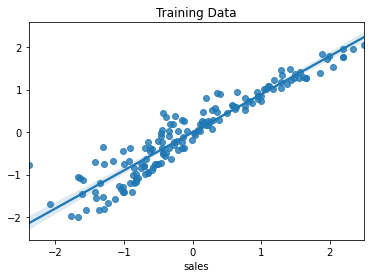

In [16]:
#Find out how well does the model fit the data?
#first, lets visualise the actual values and the predictions using regplot
#Graphical Method for preedicting model accuracy
sns.regplot(y_train,y_train_pred)
plt.title('Training Data')

**It can be observed that the model is working good**

**and that there is not much differnce between the ACTUAL and PREDICTED values**

**of the training data**

**This can be inferred from the graph by noticing that there are less**

**residual values(the values that are far away from the reg line), indicating minimal error in the prediction**

Text(0.5, 1.0, 'Testing Data')

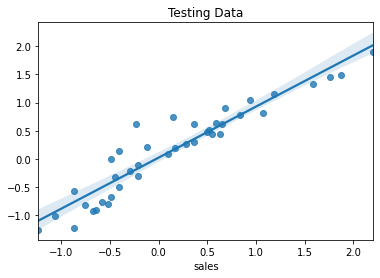

In [17]:
sns.regplot(y_test,y_test_pred)
plt.title('Testing Data')

**The model appears to work with almost same accuracy, and,**

**there is not much difference between the ACTUAL and PREDICTED values**

**of the testing data.**

**This can be infered from the data ny noticing that the residual values**

**are pretty less, indicating minimal error in the prediction**

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [19]:
#lets now check the accuracy using metrics:
#Using Statistical Metrics:
print('Training Metrics:\n')
print('R2 score: ',r2_score(y_train,y_train_pred))
print('Adjusted R2 score: ',1- (1-r2_score(y_train, y_train_pred))*(len(X_train)-1)/
                                  (len(X_train)-X_train.shape[1]-1))
print('MAE: ',mean_absolute_error(y_train,y_train_pred))
print('MSE: ',mean_squared_error(y_train,y_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nTesting Metrics:\n')
print('R2 score:', r2_score(y_test,y_test_pred))
print('Adjusted R2 score:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training Metrics:

R2 score:  0.8959372632325174
Adjusted R2 score:  0.8939360567562197
MAE:  0.2553322418777194
MSE:  0.11138075570325356
RMSE:  0.33373755512865727

Testing Metrics:

R2 score: 0.8927605914615385
Adjusted R2 score: 0.8838239740833334
MAE: 0.19987243199696367
MSE: 0.07353999839228295
RMSE 0.27118259234744946


**From the above R2 scores of TRAIN and TEST data: It can be inferred that the model has an 89% accuracy in predicting Training data and an 88% accuracy in predicting Testing data. From the above values of the RMSE of TRAIN and TEST data: It can be infered that the model has an error magnitude of 0.33 for Training data and an error magnitude of 0.27 fro Testing data**